# Filter Testing

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.animation
import astropy.units as u
import numpy as np
from hydrad_tools.configure import Configure
from hydrad_tools.parse import Strand
from hydrad_tools.visualize import plot_profile,plot_strand, animate_strand
from IPython.display import HTML

%matplotlib inline

In [ ]:
default_config = Configure.load_config('/Users/willbarnes/Documents/work/codes/hydrad_tools/defaults.asdf')

In [ ]:
default_config['general']['loop_length'] = None#90*u.Mm
default_config['general']['total_time'] = 5e3*u.s
default_config['general']['loop_inclination'] = 0*u.deg
default_config['general']['heat_flux_limiting_coefficient'] = 1./6.
default_config['initial_conditions']['heating_location'] = 45*u.Mm
default_config['initial_conditions']['heating_scale_height'] = 1e300*u.cm
default_config['heating']['events'] = [{'time_start': 0*u.s,
                                        'rise_duration': 100*u.s,
                                        'decay_duration': 100*u.s,
                                        'total_duration': 200*u.s,
                                        'location': 45*u.Mm,
                                        'scale_height': 1e300*u.cm,
                                        'rate': 0.1*u.erg/u.s/(u.cm**3)}]

In [ ]:
c = Configure(default_config)

In [ ]:
c.setup_simulation('', name='test_hydrad_run_wrong',)

In [2]:
s = Strand('test_hydrad_run/')

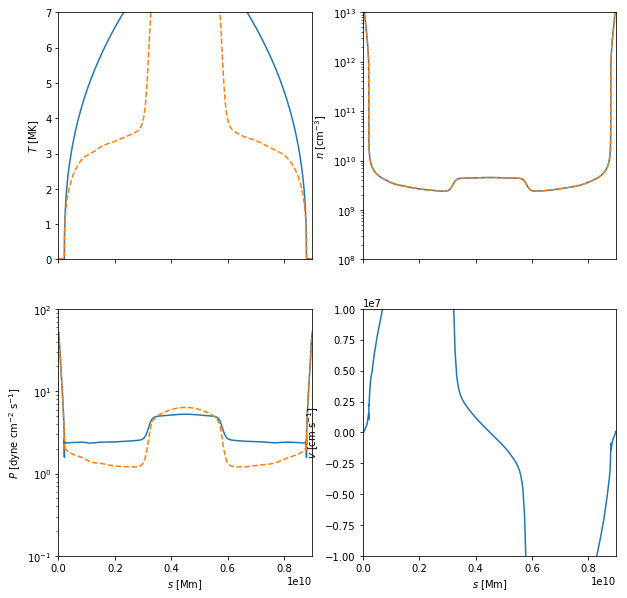

In [3]:
plot_profile(s[200],limits={'temperature':(0,7), 'velocity': (-1e7,1e7)})

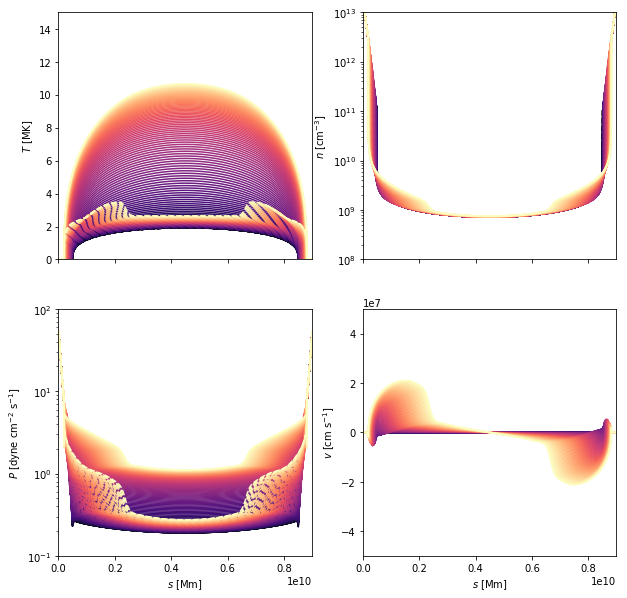

In [8]:
plot_strand(s, start=0, step=2, stop=200, cmap='magma')

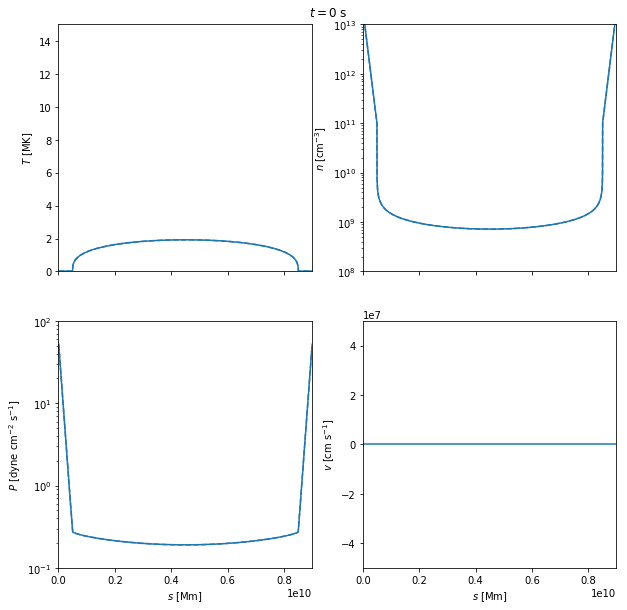

In [16]:
strand_anim = animate_strand(s,step=5,interval=10,stop=5000)

In [18]:
strand_anim.save('test_vid.mp4',writer='ffmpeg',)

In [17]:
HTML(strand_anim.to_html5_video())

In [ ]:
s.time[0:1001:100]

In [ ]:
viridis_cmap = plt.cm.viridis

In [ ]:
foo = matplotlib.colors.LinearSegmentedColormap.from_list('',plt.get_cmap('viridis').colors, N=1000)

In [ ]:
foo(800)

In [ ]:
plt.figure(figsize=(12,12))
plt.subplot(221)
plt.plot(s[100].coordinate,s[100].electron_temperature)
plt.plot(s[100].coordinate,s[100].ion_temperature)
plt.ylim(0,2e7)
plt.subplot(222)
plt.plot(s[100].coordinate,s[100].electron_density)
plt.plot(s[100].coordinate,s[100].ion_density)
plt.yscale('log')
plt.ylim(1e8,1e13)
plt.subplot(223)
plt.plot(s[100].coordinate,s[100].electron_pressure)
plt.plot(s[100].coordinate,s[100].ion_pressure)
plt.ylim(1e-1,1e2)
plt.yscale('log')
plt.subplot(224)
plt.plot(s[100].coordinate,s[100].velocity)
plt.ylim(-5e7,5e7)

Try making an animation

In [ ]:
# Setup frame
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
# L
ax1.set_ylim(0,15)
ax1.set_xlim(0,s.loop_length.to(u.Mm).value)
ax2.set_ylim(1e8,1e13)
ax2.set_xlim(0,s.loop_length.to(u.Mm).value)
ax2.set_yscale('log')
ax3.set_ylim(0.1,1e2)
ax3.set_xlim(0,s.loop_length.to(u.Mm).value)
ax3.set_yscale('log')
ax4.set_ylim(-5e7,5e7)
ax4.set_xlim(0,s.loop_length.to(u.Mm).value)
# Labels
ax1.set_ylabel(r'$T$ [MK]')
ax2.set_ylabel(r'$n$ [cm$^{-3}$]')
ax3.set_ylabel(r'$P$ [dyne cm$^{-2}$ s$^{-1}$]')
ax4.set_ylabel(r'$v$ [cm s$^{-1}$]')
ax3.set_xlabel(r'$s$ [Mm]')
ax4.set_xlabel(r'$s$ [Mm]')
# Initial plots
p = s[0]
line1a, = ax1.plot(p.coordinate.to(u.Mm), p.electron_temperature.to(u.MK))
line1b, = ax1.plot(p.coordinate.to(u.Mm), p.ion_temperature.to(u.MK))
line2a, = ax2.plot(p.coordinate.to(u.Mm), p.electron_density)
line2b, = ax2.plot(p.coordinate.to(u.Mm), p.ion_density)
line3a, = ax3.plot(p.coordinate.to(u.Mm), p.electron_pressure)
line3b, = ax3.plot(p.coordinate.to(u.Mm), p.ion_pressure)
line4, = ax4.plot(p.coordinate.to(u.Mm), p.velocity)
# Update func
def update_plot(i):
    p = s[i]
    line1a.set_data(p.coordinate.to(u.Mm), p.electron_temperature.to(u.MK))
    line1b.set_data(p.coordinate.to(u.Mm), p.ion_temperature.to(u.MK))
    line2a.set_data(p.coordinate.to(u.Mm), p.electron_density)
    line2b.set_data(p.coordinate.to(u.Mm), p.ion_density)
    line3a.set_data(p.coordinate.to(u.Mm), p.electron_pressure)
    line3b.set_data(p.coordinate.to(u.Mm), p.ion_pressure)
    line4.set_data(p.coordinate.to(u.Mm), p.velocity)
    fig.suptitle(r'$t={:4.0f}$ {}'.format(s.time[i].value,s.time[i].unit),y=0.905)
    return line1a,line1b,line2a,line2b,line3a,line3b,line4
# Create animation
anim = matplotlib.animation.FuncAnimation(fig,update_plot,blit=True,frames=s.time.shape[0],interval=5,repeat=True)

In [ ]:
anim.save('test_mov.mp4',writer='ffmpeg',)

In [ ]:
HTML(anim.to_html5_video())

In [ ]:
# Setup frame
fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(111)
# Limits
ax1.set_ylim(0,15)
ax1.set_xlim(0,s.loop_length.to(u.Mm).value)
# Labels
ax1.set_ylabel(r'$T$ [MK]')
ax1.set_xlabel(r'$s$ [Mm]')
# Initial plots
p = s[0]
line1a, = ax1.plot(p.coordinate.to(u.Mm), p.electron_temperature.to(u.MK))
line1b, = ax1.plot(p.coordinate.to(u.Mm), p.ion_temperature.to(u.MK))
# Update func
def update_plot(i):
    p = s[i]
    line1a.set_data(p.coordinate.to(u.Mm), p.electron_temperature.to(u.MK))
    line1b.set_data(p.coordinate.to(u.Mm), p.ion_temperature.to(u.MK))
    return line1a,line1b
# Create animation
anim = matplotlib.animation.FuncAnimation(fig,update_plot,blit=True,frames=1000,interval=10,repeat=True)

In [ ]:
HTML(anim.to_html5_video())

In [ ]:
anim.save('test_temperature.mp4',writer='ffmpeg',)